In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [2]:
df = pd.read_csv("HappinessAlcoholConsumption.csv")
df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


this dataframe contains 121 countries and the amount and type of alcohol in each one of them.

In [9]:
df = df.drop_duplicates().dropna().drop(columns="GDP_PerCapita")

cleaning data.
gpd percapita removed because it's data was unacurate.

In [6]:
encoder = LabelEncoder()
encoded_country_list = []
df["encoded_country"] = encoder.fit_transform(df["Country"])

i = 0
for encoded in encoder.inverse_transform(df["encoded_country"]):    
    encoded_country_list.append((i, encoded))
    i+=1
print(encoded_country_list)  

df["encoded_region"] = encoder.fit_transform(df["Region"])
print(encoder.inverse_transform([0, 1, 2, 3, 4, 5]))
      
df["encoded_hemisphere"] = encoder.fit_transform(df["Hemisphere"])
print(encoder.inverse_transform([0, 1, 2]))

[(0, 'Denmark'), (1, 'Switzerland'), (2, 'Iceland'), (3, 'Norway'), (4, 'Finland'), (5, 'Canada'), (6, 'Netherlands'), (7, 'New Zealand'), (8, 'Australia'), (9, 'Sweden'), (10, 'Israel'), (11, 'Austria'), (12, 'United States'), (13, 'Costa Rica'), (14, 'Germany'), (15, 'Brazil'), (16, 'Belgium'), (17, 'Ireland'), (18, 'Luxembourg'), (19, 'Mexico'), (20, 'Singapore'), (21, 'United Kingdom'), (22, 'Chile'), (23, 'Panama'), (24, 'Argentina'), (25, 'Czech Republic'), (26, 'United Arab Emirates'), (27, 'Uruguay'), (28, 'Malta'), (29, 'Colombia'), (30, 'France'), (31, 'Thailand'), (32, 'Qatar'), (33, 'Spain'), (34, 'Guatemala'), (35, 'Suriname'), (36, 'Bahrain'), (37, 'Trinidad and Tobago'), (38, 'Venezuela'), (39, 'Slovakia'), (40, 'El Salvador'), (41, 'Nicaragua'), (42, 'Uzbekistan'), (43, 'Italy'), (44, 'Ecuador'), (45, 'Belize'), (46, 'Japan'), (47, 'Kazakhstan'), (48, 'Moldova'), (49, 'Russian Federation'), (50, 'Poland'), (51, 'South Korea'), (52, 'Bolivia'), (53, 'Lithuania'), (54, 'B

encoding non_number values for heatmap.

In [10]:
df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,encoded_country,encoded_region,encoded_hemisphere
0,Denmark,Western Europe,north,7.526,928,224,81,278,32,8,1
1,Switzerland,Western Europe,north,7.509,943,185,100,280,103,8,1
2,Iceland,Western Europe,north,7.501,933,233,61,78,49,8,1
3,Norway,Western Europe,north,7.498,951,169,71,129,81,8,1
4,Finland,Western Europe,north,7.413,918,263,133,97,38,8,1


<Axes: >

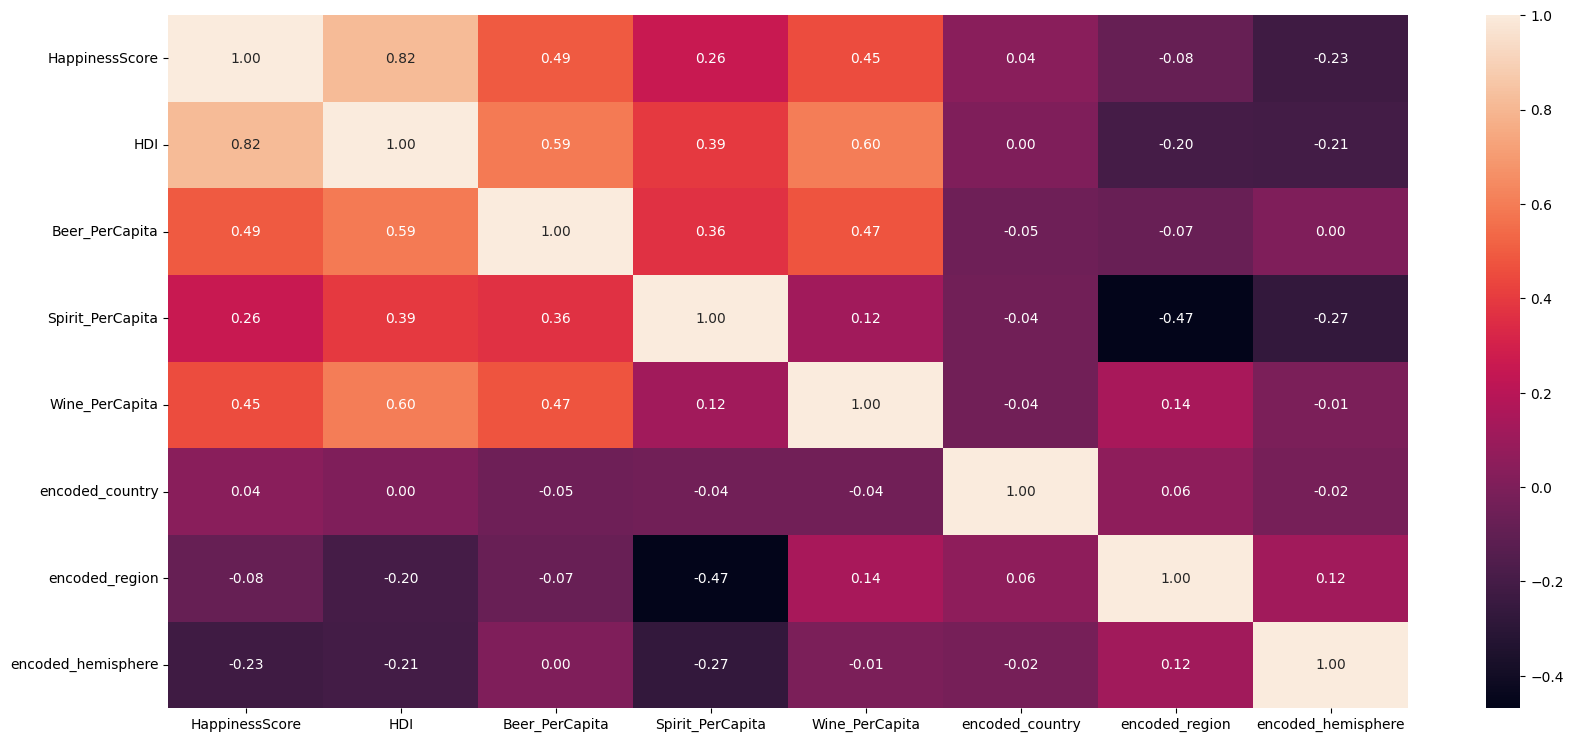

In [11]:
plt.figure(figsize=(20,9))
tmp = df.drop(columns=["Country","Region","Hemisphere"])
sns.heatmap(tmp.corr(), annot=True, fmt="0.2f")

heatmap shows:
1. HDI and Happiness score are directly dependent on each other; meaning that the higher the HDI the higher the happines score is.
2. HDI with wine percapita and beer percapita are half correlated. the heatmap shows that the higher the HDI goes drinking wine and beer increases.
3. Happiness with beer and wine percapita are half correlated. 

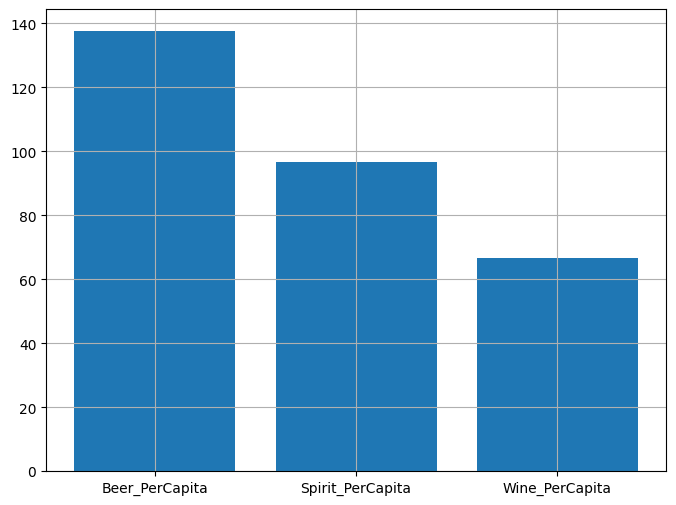

In [7]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot()
x = [0,1,2]
y = [df["Beer_PerCapita"].mean(), df["Spirit_PerCapita"].mean(), df["Wine_PerCapita"].mean()]
ax.bar(x,y)
ax.set_xticks(x, ["Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"], rotation=0)
ax.grid()

this plot shows that how much of each type of alcohol has been consumed.

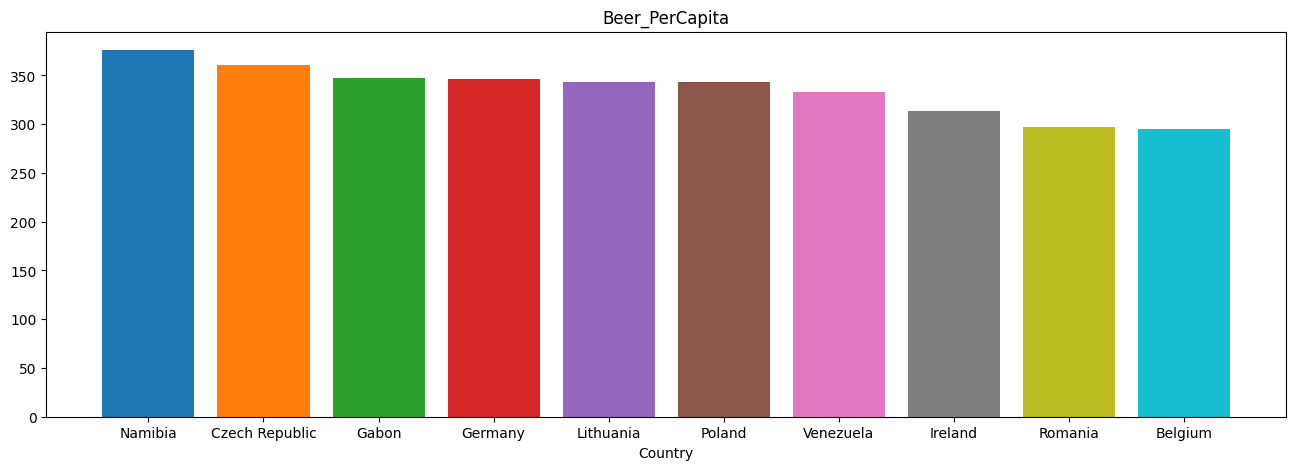

In [8]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot()
ax.set_xlabel("Country")
ax.set_title("Beer_PerCapita")

j = 0
for i in df.sort_values(by=["Beer_PerCapita"], ascending=False).index:
    j = j + 1
    if j <= 10:
        ax.bar(df.iloc[i]["Country"], df.iloc[i]["Beer_PerCapita"])
    elif j > 10:
        break 

according to this plot this are the top 10 countries wich has the most beer consumption.

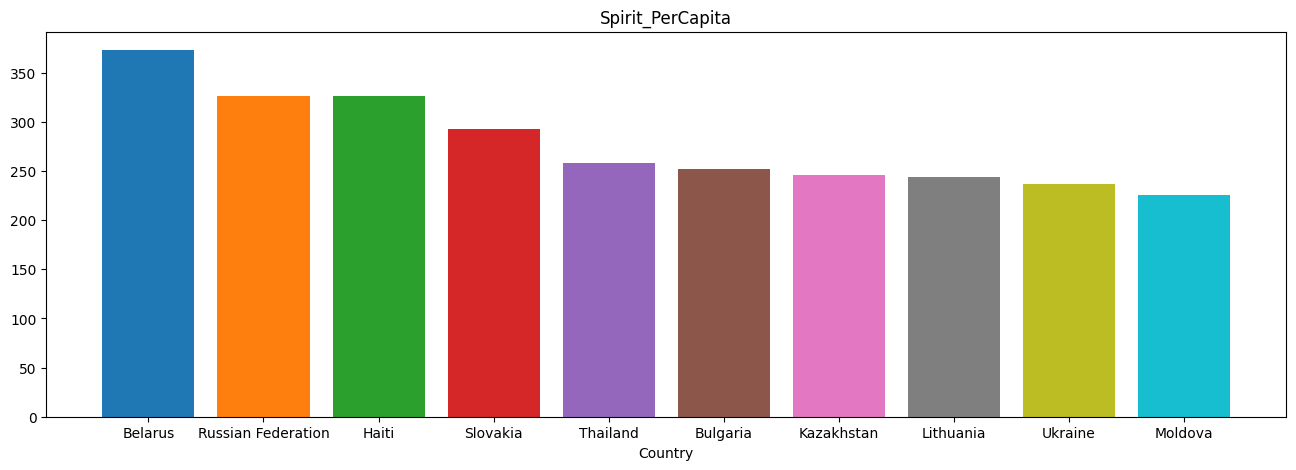

In [9]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot()
ax.set_xlabel("Country")
ax.set_title("Spirit_PerCapita")

j = 0
for i in df.sort_values(by=["Spirit_PerCapita"], ascending=False).index:
    j = j + 1
    if j <= 10:
        ax.bar(df.iloc[i]["Country"], df.iloc[i]["Spirit_PerCapita"])
    elif j > 10:
        break 

according to this plot this are the top 10 countries wich has the most spirit consumption.

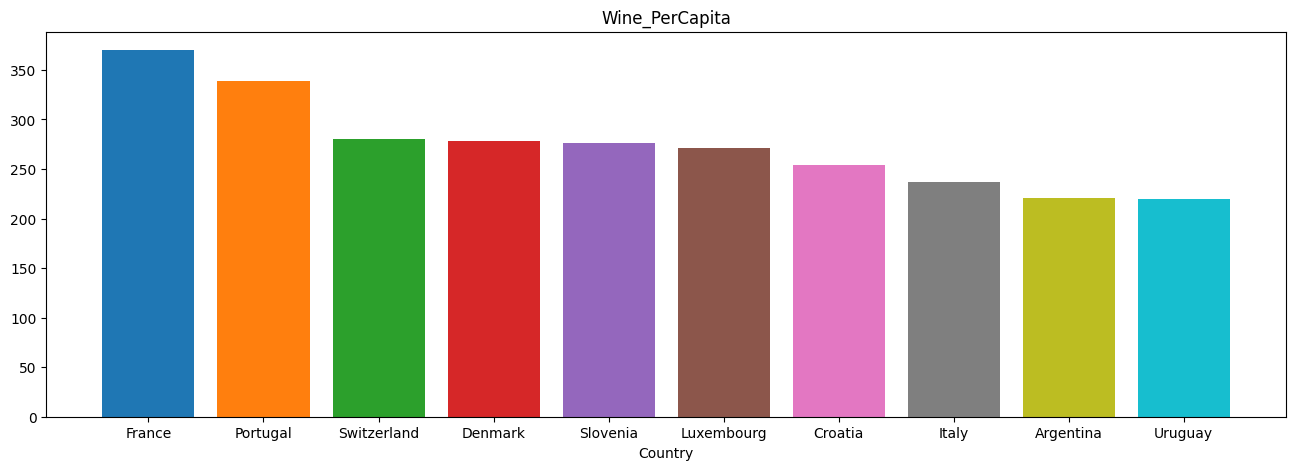

In [10]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot()
ax.set_xlabel("Country")
ax.set_title("Wine_PerCapita")

j = 0
for i in df.sort_values(by=["Wine_PerCapita"], ascending=False).index:
    j = j + 1
    if j <= 10:
        ax.bar(df.iloc[i]["Country"], df.iloc[i]["Wine_PerCapita"])
    elif j > 10:
        break 

according to this plot this are the top 10 countries wich has the most wine consumption.

In [14]:
a_df = pd.DataFrame()
a_df["country"]  =df["Country"]
a_df["alcohol"] = df["Beer_PerCapita"] + df["Spirit_PerCapita"] + df["Wine_PerCapita"]
a_df["HappinessScore"] = df["HappinessScore"]
a_df["HDI"] = df["HDI"]
a_df["Beer_PerCapita"] = df["Beer_PerCapita"]
a_df["Spirit_PerCapita"] = df["Spirit_PerCapita"]
a_df["Wine_PerCapita"] = df["Wine_PerCapita"]

descending_a_df = a_df.sort_values(by=["alcohol"], ascending=False)
ascending_a_df = a_df.sort_values(by=["alcohol"], ascending=True)

a_df.head()

,country,alcohol,HappinessScore,HDI,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,583,7.526,928,224,81,278
1,Switzerland,565,7.509,943,185,100,280
2,Iceland,372,7.501,933,233,61,78
3,Norway,369,7.498,951,169,71,129
4,Finland,493,7.413,918,263,133,97


Three dataframes are made:
1. a_df: a dataframe that has an extra column "alcohol", which is ("Beer_PerCapita" + "Spirit_PerCapita" + "Wine_PerCapita") for each country.
2. descending_a_df: sorted descending type of a_df by "alcohol" 
3. ascending_a_df: sorted ascending type of a_df by "alcohol"

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5572\1186906962.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, new_df1], ignore_index=True)


<Axes: xlabel='country'>

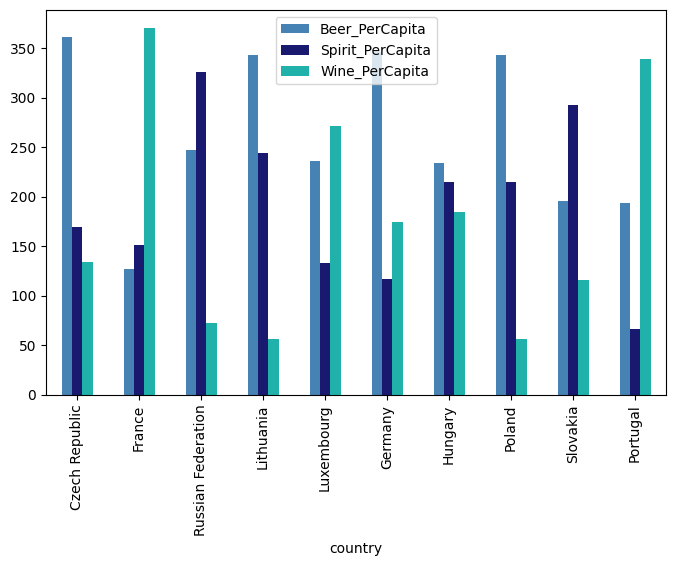

In [12]:
new_df = pd.DataFrame(columns=["country", "alcohol", "HappinessScore", "HDI", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"])
j = 0
for i in descending_a_df.index:
    j = j + 1
    if j <= 10:
        new_df1 = pd.DataFrame([a_df.iloc[i]])
        new_df = pd.concat([new_df, new_df1], ignore_index=True)
    elif j > 10:
        break 

my_color =["steelblue", "midnightblue","lightseagreen"]
new_df.plot(x="country", y=["Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"], 
            kind="bar",figsize=(8,5), color=my_color)

This plot shows top 10 countries which have the most alcohol consumption divided by each type of alcohol. 
It is intersting that the most used type of alcohol in each of the top 3 countries are completly differnt:
1. Czech Republic: beer 
2. France: wine
3. Russian Federation: spirit

people of 5 of this countries prefered drinking beer over the other two.

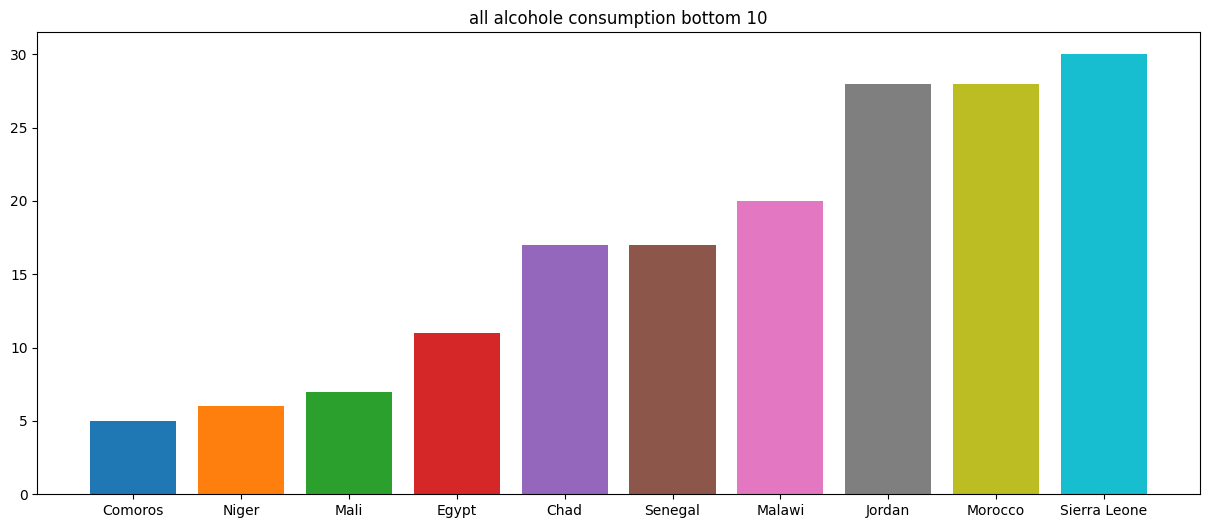

In [13]:
fig =plt.figure(figsize=(15,6))
ax = fig.add_subplot()
ax.set_title("all alcohole consumption bottom 10")

j = 0
for i in ascending_a_df.index:
    j = j + 1
    if j <= 10:
        ax.bar(a_df.iloc[i]["country"], a_df.iloc[i]["alcohol"])
    elif j > 10:
        break 

10 bottom countries that consume alcohol.

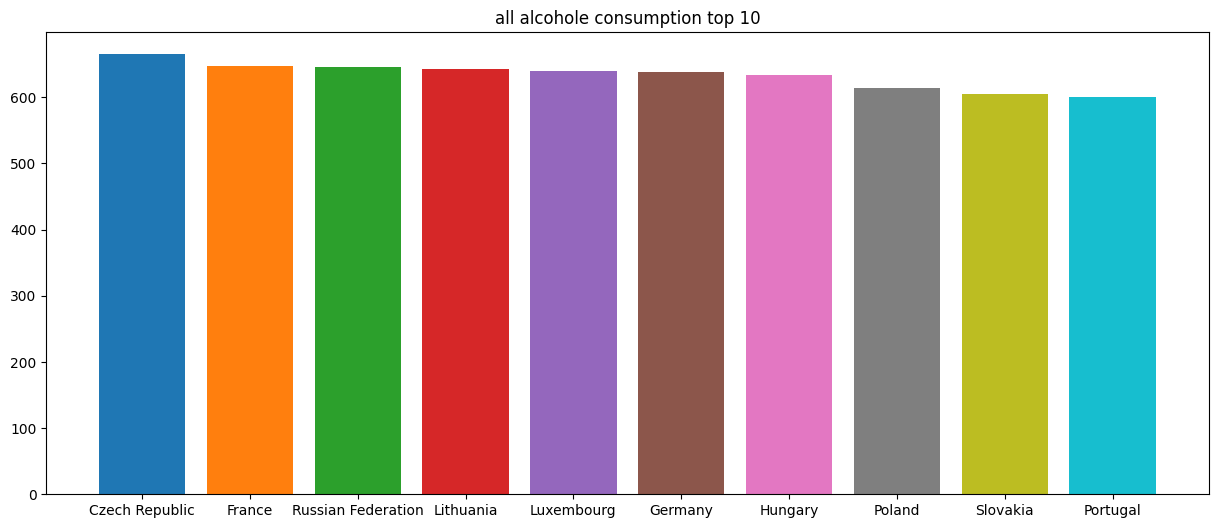

In [14]:
fig =plt.figure(figsize=(15,6))
ax = fig.add_subplot()
ax.set_title("all alcohole consumption top 10")
j = 0
for i in descending_a_df.index:
    j = j + 1
    if j <= 10:
        ax.bar(a_df.iloc[i]["country"], a_df.iloc[i]["alcohol"])
    elif j > 10:
        break  

10 bottom countries that consume alcohol.

<Axes: >

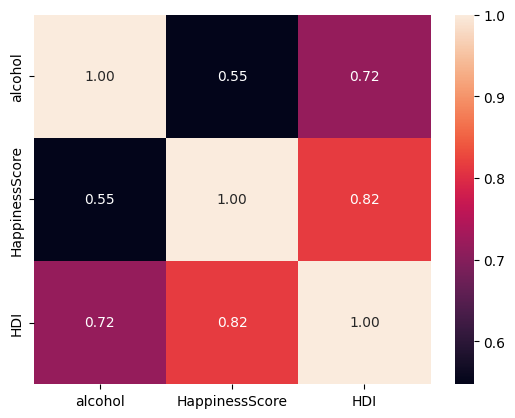

In [15]:
tmp = a_df.drop(columns=["country", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"])
sns.heatmap(tmp.corr(), annot=True, fmt="0.2f")

heatmap for HDI, Happiness score, alcohol(sum of "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"):
1. total alcohol consumption and HDI are correlated by coeff of 0.72 meaning where ever the HDI is higher it's alcohol consumption is higher too.
2. happiness and total alcohol consomption are half correlated.

In [17]:
alcohol_df = pd.DataFrame()
alcohol_df["Beer_PerCapita"] = df["Beer_PerCapita"]
alcohol_df["Spirit_PerCapita"] = df["Spirit_PerCapita"]
alcohol_df["Wine_PerCapita"] = df["Wine_PerCapita"]

یک دیتافریم جدید میسازیم که تنها سه ستون مربوط به مصرف الکل در آن باشد تا بر اساس آن بتوانیم با استفاده از تابع .idmax() بیشترین نوع الکلی که در هر کشور مصرف شده را پیدا کنیم

In [18]:
for i in alcohol_df.index:
    print(i, df.iloc[i]["Country"], alcohol_df.iloc[i].max(), alcohol_df.iloc[i].idxmax())

0 Denmark 278 Wine_PerCapita
1 Switzerland 280 Wine_PerCapita
2 Iceland 233 Beer_PerCapita
3 Norway 169 Beer_PerCapita
4 Finland 263 Beer_PerCapita
5 Canada 240 Beer_PerCapita
6 Netherlands 251 Beer_PerCapita
7 New Zealand 203 Beer_PerCapita
8 Australia 261 Beer_PerCapita
9 Sweden 186 Wine_PerCapita
10 Israel 69 Spirit_PerCapita
11 Austria 279 Beer_PerCapita
12 United States 249 Beer_PerCapita
13 Costa Rica 149 Beer_PerCapita
14 Germany 346 Beer_PerCapita
15 Brazil 245 Beer_PerCapita
16 Belgium 295 Beer_PerCapita
17 Ireland 313 Beer_PerCapita
18 Luxembourg 271 Wine_PerCapita
19 Mexico 238 Beer_PerCapita
20 Singapore 60 Beer_PerCapita
21 United Kingdom 219 Beer_PerCapita
22 Chile 172 Wine_PerCapita
23 Panama 285 Beer_PerCapita
24 Argentina 221 Wine_PerCapita
25 Czech Republic 361 Beer_PerCapita
26 United Arab Emirates 135 Spirit_PerCapita
27 Uruguay 220 Wine_PerCapita
28 Malta 149 Beer_PerCapita
29 Colombia 159 Beer_PerCapita
30 France 370 Wine_PerCapita
31 Thailand 258 Spirit_PerCapita

بیشترین مقدار الکلی که از یک نوع در هر کشور مصرف شده و نوع آن

In [24]:
a = 0
b = 0
c = 0
for i in alcohol_df.index:
    if alcohol_df.iloc[i].idxmax() == "Beer_PerCapita":
        a += 1
    elif alcohol_df.iloc[i].idxmax() == "Spirit_PerCapita":
        b += 1
    elif alcohol_df.iloc[i].idxmax() == "Wine_PerCapita":
        c += 1
print(a,b,c)

70 37 15


هر نوع الکل چند بار بیشترین مقدار مصرف را در هر کشور داشته و نمودار آن:

<Axes: xlabel='kind', ylabel='count'>

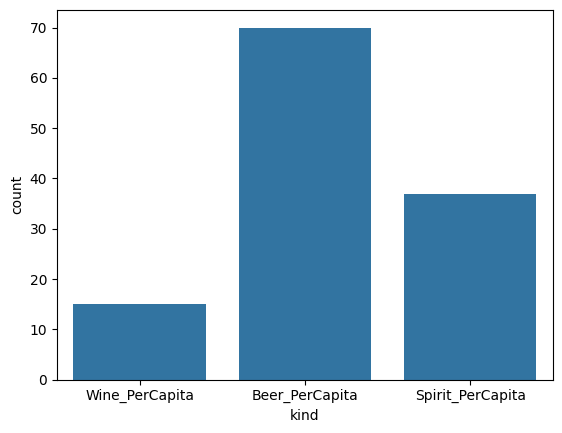

In [36]:
emp_list = []
for i in alcohol_df.index:
    if alcohol_df.iloc[i].idxmax() == "Beer_PerCapita":
        emp_list.append(alcohol_df.iloc[i].idxmax())
    elif alcohol_df.iloc[i].idxmax() == "Spirit_PerCapita":
        emp_list.append(alcohol_df.iloc[i].idxmax())
    elif alcohol_df.iloc[i].idxmax() == "Wine_PerCapita":
        emp_list.append(alcohol_df.iloc[i].idxmax())
        
count_df = pd.DataFrame()
count_df["kind"] = emp_list
sns.countplot(x=dataframe["kind"], data=count_df)

In [16]:
j = 0
for i in df.sort_values(by=["HappinessScore"]).index:
    j = j + 1
    if j <= 10:
        print(a_df.iloc[i]["alcohol"], a_df.iloc[i]["country"], df.sort_values(by=["HappinessScore"], ascending=False).iloc[i]["HappinessScore"])
    else:
        break

56 Syria 3.069
57 Togo 3.303
51 Benin 3.484
173 Liberia 3.622
43 Tanzania 3.666
45 Madagascar 3.695
39 Burkina Faso 3.739
17 Chad 3.763
6 Niger 3.856
319 Angola 3.866


total alcohol, country, HappinessScore

shows the 10 bottom countries sorted by happiness score and their total alcohol consumption

In [19]:
j = 0
for i in df.sort_values(by=["HappinessScore"], ascending=False).index:
    j = j + 1
    if j <= 10:
        print(a_df.iloc[i]["alcohol"], a_df.iloc[i]["country"], df.sort_values(by=["HappinessScore"], ascending=False).iloc[i]["HappinessScore"])
    else:
        break

583 Denmark 7.526
565 Switzerland 7.509
372 Iceland 7.501
369 Norway 7.498
493 Finland 7.413
462 Canada 7.404
529 Netherlands 7.339
457 New Zealand 7.334
545 Australia 7.313
398 Sweden 7.291


total alcohol, country, HappinessScore

shows the 10 top countries sorted by happiness score and their total alcohol consumption

<Axes: xlabel='count', ylabel='Hemisphere'>

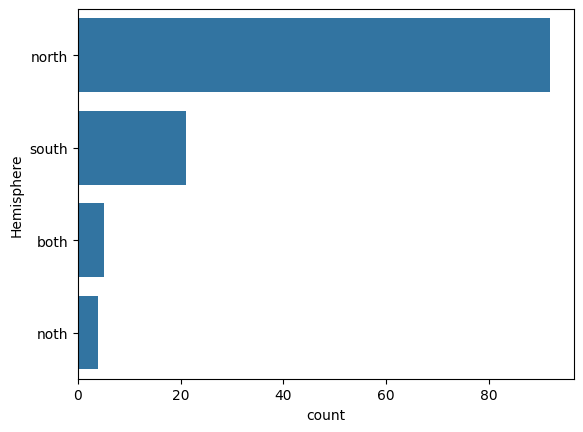

In [43]:
sns.countplot(df["Hemisphere"])

تعداد کشورهای هر نیمکره که در این دیتاست آمده اند

کشورهای نیمکره ی شمالی بیشتر در این دیتاست وجود دارند

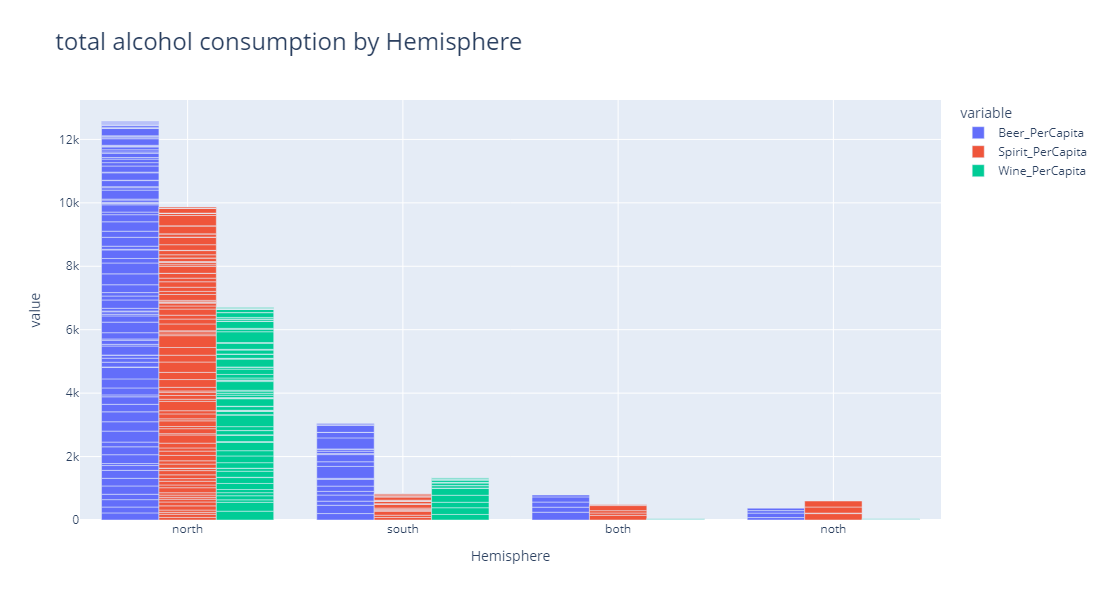

In [58]:
y=["Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"]
(px.bar(df, x="Hemisphere",y=y, title="total alcohol consumption by Hemisphere",
        barmode="group", width=800, height=600).update_layout(title_font_size=24).update_xaxes(showgrid=True)).show()

A plot that shows how much is each Hemisphere's alcohol consumption by type of alcohol.

In [70]:
Hemisphere_df = pd.DataFrame()
Beer_PerCapita_list= []
Spirit_PerCapita_list= []
Wine_PerCapita_list= []

for i in df.groupby("Hemisphere"):
    new_i = i[1]
    Beer_PerCapita_list.append(new_i["Beer_PerCapita"].sum())
    Spirit_PerCapita_list.append(new_i["Spirit_PerCapita"].sum())
    Wine_PerCapita_list.append(new_i["Wine_PerCapita"].sum())

Hemisphere_df["Hemisphere"] = df.groupby("Hemisphere").dtypes.index
Hemisphere_df["Beer_PerCapita"] = Beer_PerCapita_list
Hemisphere_df["Spirit_PerCapita"] = Spirit_PerCapita_list
Hemisphere_df["Wine_PerCapita"] = Wine_PerCapita_list

Hemisphere_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5572\3680581275.py:12: FutureWarning:

DataFrameGroupBy.dtypes is deprecated and will be removed in a future version. Check the dtypes on the base object instead



,Hemisphere,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,both,787,477,45
1,north,12581,9870,6707
2,noth,373,599,41
3,south,3042,839,1332


Making a dataframe that shows the total and type of alcohol consumption of each Hemisphere. it is for making a 

<Axes: xlabel='Hemisphere'>

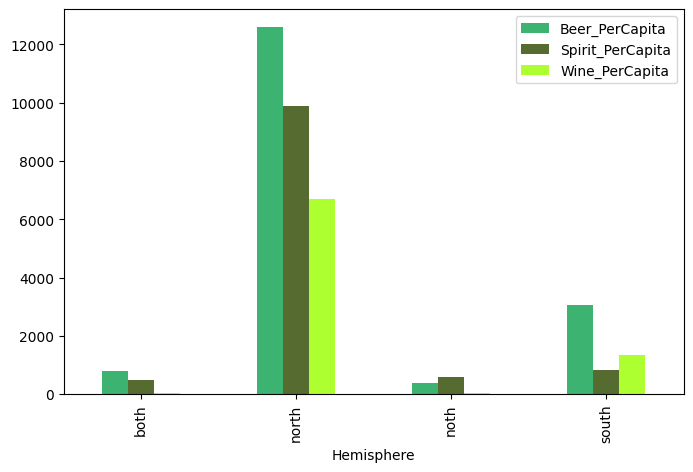

In [73]:
my_color =['mediumseagreen', 'darkolivegreen','greenyellow']
Hemisphere_df.plot(x="Hemisphere", y=["Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"], 
            kind="bar",figsize=(8,5), color=my_color)

In [20]:
plt.show()